In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read the data to the environment

In [2]:
data = pd.read_csv(r'D:\ICT kerala\competition\movies.csv')

In [3]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
data.shape

(7668, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
data.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


# Pre-processing

### Feature reduction

* The 'name' obviously has no influence on the budget.
* The 'score', 'vote' and 'gross' are information that cannot be obtained for future predictions.
* Also the 'released' can be dropped

In [7]:
data.drop(['name','score','votes','gross','released'], axis=1, inplace=True)

In [8]:
data.columns

Index(['rating', 'genre', 'year', 'director', 'writer', 'star', 'country',
       'budget', 'company', 'runtime'],
      dtype='object')

### Handling Missing Values

In [9]:
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data['rating'].count()*100).sort_values(ascending=False)
missing = pd.concat([total,percent], axis=1, keys=['total','percent'])
missing

,total,percent
budget,2171,28.599657
rating,77,1.014359
company,17,0.223949
runtime,4,0.052694
writer,3,0.039520
country,3,0.039520
star,1,0.013173
genre,0,0.000000
year,0,0.000000
director,0,0.000000


Checking the skewness and outliers before missing value imputation

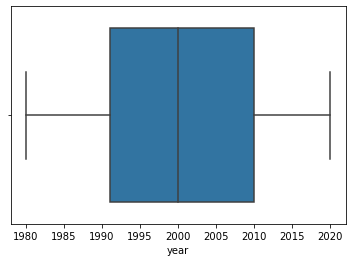

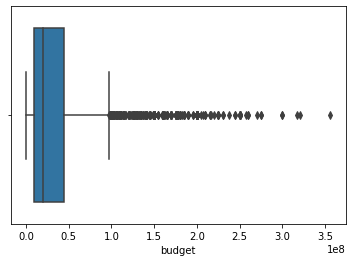

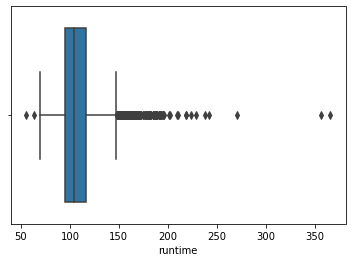

In [10]:
numvars = data.select_dtypes(include=['float','int64'])
for x in numvars:
    sns.boxplot(data[x])
    plt.show()

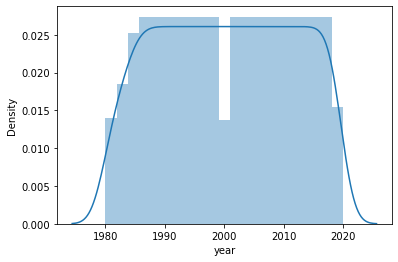

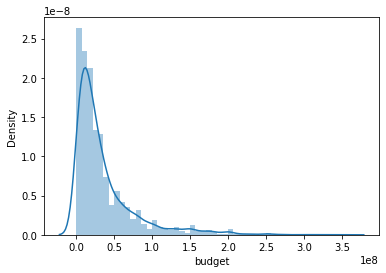

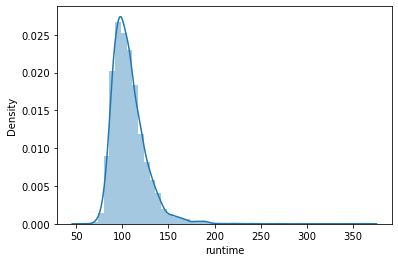

In [11]:
for x in numvars:
    sns.distplot(data[x])
    plt.show()

Since there are outliers and are skewed, we cannot use mean for imputation. We can use median instead.

Only 'budget' and 'runtime' are the numerical variables with missing values and we use median for imputation there.

'rating', 'company', writer', 'country' and 'star' are the categorical variables having missing values. We can use mode in such situation.

In [12]:
from sklearn.impute import SimpleImputer
im_med = SimpleImputer(missing_values = np.nan, strategy = 'median')
l1=['budget','runtime']
for x in l1:
    im_med.fit(data[[x]])
    data[[x]] = im_med.transform(data[[x]])
    
im_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
l2=['company','country','rating','writer','star']
for x in l2:
    im_mode.fit(data[[x]])
    data[[x]] = im_mode.transform(data[[x]])
    

In [13]:
data.isna().sum()

rating      0
genre       0
year        0
director    0
writer      0
star        0
country     0
budget      0
company     0
runtime     0
dtype: int64

In [14]:
data.shape

(7668, 10)

### Handling Outliers

Using the interquartile range.

In [15]:
def iqr_fn(df,var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3 - q1
    uplim = q3 + (iqr*1.5)
    lowlim = q1 - (iqr*1.5)
    print('upper limit : ',uplim)
    print('Lower limit : ',lowlim )

In [16]:
iqr_fn(data, 'budget')

upper limit :  59000000.0
Lower limit :  -13000000.0


In [17]:
iqr_fn(data, 'runtime')

upper limit :  147.5
Lower limit :  63.5


In [18]:
out_budget = []
for x in data['budget']:
    if (x>59000000.0) or (x<-13000000.0):
        out_budget.append(x)
print(len(out_budget))

1008


Replacing the outliers with median.

In [19]:
med_budget = data.loc[data['budget']>59000000.0, 'budget'].median()
data.loc[data['budget']>59000000.0,'budget'] = np.nan
data.fillna(med_budget, inplace=True)

<AxesSubplot:xlabel='budget'>

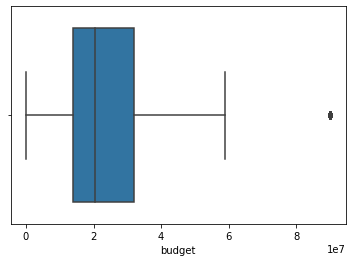

In [20]:
sns.boxplot(data['budget'])

In [21]:
out_rntm = []
for x in data['runtime']:
    if (x>147.5) or (x<63.5):
        out_rntm.append(x)
print(out_rntm)

[219.0, 173.0, 150.0, 149.0, 195.0, 155.0, 167.0, 150.0, 191.0, 188.0, 170.0, 193.0, 55.0, 229.0, 160.0, 164.0, 153.0, 187.0, 154.0, 162.0, 161.0, 185.0, 149.0, 153.0, 163.0, 157.0, 157.0, 357.0, 155.0, 164.0, 168.0, 171.0, 161.0, 175.0, 162.0, 181.0, 158.0, 189.0, 238.0, 158.0, 189.0, 158.0, 156.0, 202.0, 154.0, 160.0, 182.0, 195.0, 154.0, 180.0, 271.0, 188.0, 171.0, 154.0, 191.0, 159.0, 170.0, 178.0, 178.0, 192.0, 167.0, 176.0, 149.0, 162.0, 242.0, 159.0, 155.0, 194.0, 154.0, 150.0, 155.0, 155.0, 177.0, 169.0, 151.0, 178.0, 170.0, 169.0, 169.0, 177.0, 172.0, 159.0, 189.0, 188.0, 157.0, 162.0, 148.0, 162.0, 148.0, 181.0, 160.0, 155.0, 165.0, 154.0, 173.0, 186.0, 172.0, 152.0, 178.0, 183.0, 157.0, 224.0, 152.0, 183.0, 210.0, 150.0, 161.0, 179.0, 167.0, 185.0, 201.0, 154.0, 154.0, 178.0, 219.0, 186.0, 366.0, 163.0, 170.0, 156.0, 175.0, 152.0, 189.0, 192.0, 186.0, 182.0, 157.0, 187.0, 164.0, 151.0, 151.0, 149.0, 154.0, 167.0, 180.0, 167.0, 193.0, 158.0, 157.0, 148.0, 157.0, 169.0, 191.0,

In [22]:
med_runtime = data.loc[data['runtime']>147.5, 'runtime'].median()
data['runtime'] = np.where(data['runtime']>147.5, med_runtime, data['runtime'])
data.fillna(med_runtime,inplace=True)
lo_med =med_runtime = data.loc[data['runtime']<63.5, 'runtime'].median()
data["runtime"] = np.where(data["runtime"] <63.5, lo_med,data['runtime'])
data.fillna(lo_med,inplace=True)

<AxesSubplot:xlabel='runtime'>

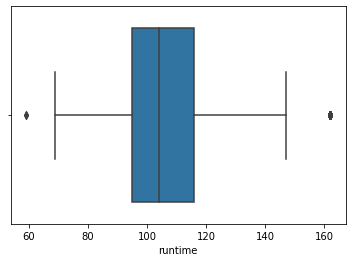

In [23]:
sns.boxplot(data['runtime'])

## Exploratory Data Analysis

### Univariate Analysis

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

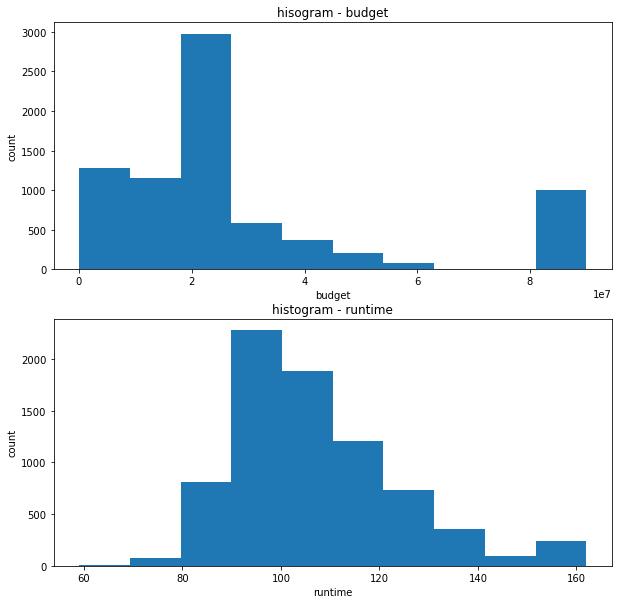

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('hisogram - budget')
plt.xlabel('budget')
plt.ylabel('count')
plt.hist(data.budget)
plt.subplot(2,1,2)
plt.title('histogram - runtime')
plt.xlabel('runtime')
plt.ylabel('count')
plt.hist(data.runtime)
plt.tight_layout


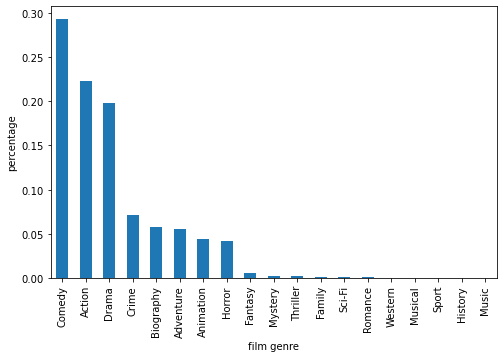

In [25]:
plt.figure(figsize=(8,5))
data.genre.value_counts(normalize=True).plot.bar()
plt.xlabel('film genre')
plt.ylabel('percentage')
plt.show()

### Bivariate Analysis

         year  budget  runtime
year     1.00    0.29     0.14
budget   0.29    1.00     0.28
runtime  0.14    0.28     1.00


<AxesSubplot:>

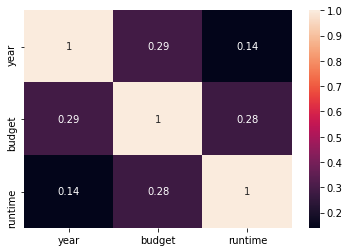

In [26]:
corr_matrix = data.corr().round(2)
print(corr_matrix)
sns.heatmap(corr_matrix, annot =True)

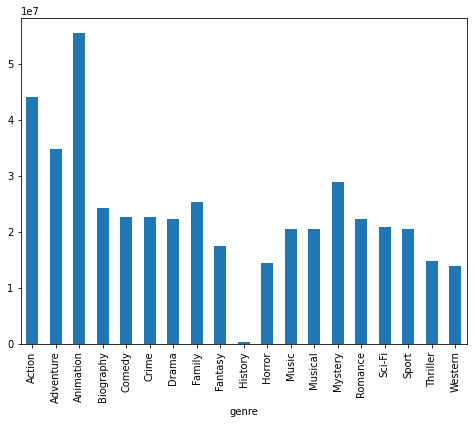

In [27]:
plt.figure(figsize=(8,6))
data.groupby('genre')['budget'].mean().plot.bar()
plt.show()

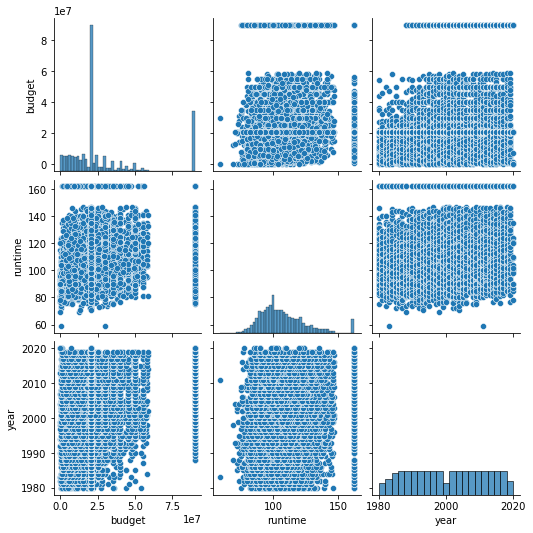

In [28]:
sns.pairplot(data[['budget', 'runtime','year']])

## Encoding

In [29]:
data.head()

,rating,genre,year,director,writer,star,country,budget,company,runtime
0,R,Drama,1980,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,Warner Bros.,146.0
1,R,Adventure,1980,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,Columbia Pictures,104.0
2,PG,Action,1980,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,Lucasfilm,124.0
3,PG,Comedy,1980,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,Paramount Pictures,88.0
4,R,Comedy,1980,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,Orion Pictures,98.0


In [30]:
for x in data.drop(['year','budget','runtime'], axis=1).columns:
    print('For -',x,'- the number of unique values are: ',len(np.unique(data[x])))

For - rating - the number of unique values are:  12
For - genre - the number of unique values are:  19
For - director - the number of unique values are:  2949
For - writer - the number of unique values are:  4535
For - star - the number of unique values are:  2814
For - country - the number of unique values are:  59
For - company - the number of unique values are:  2385


In [31]:
data.drop(['director','writer','star', 'country'],axis=1,inplace=True)

In [32]:
# Splitting the data to target ane feature set
x = data.drop(['budget'], axis=1)
y = data[['budget']]

### Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
x[['rating']] = lbe.fit_transform(x[['rating']])
x[['year']] = lbe.fit_transform(x[['year']])

### One Hot Encoding

In [34]:
x = pd.get_dummies(x)

In [35]:
x.head()

,rating,year,runtime,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,company_Zoetrope Studios,company_Zucker Brothers Productions,company_Zupnik-Curtis Enterprises,company_double A Films,company_erbp,company_i am OTHER,company_i5 Films,company_iDeal Partners Film Fund,company_micro_scope,company_thefyzz
0,6,0,146.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6,0,104.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,124.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,88.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,98.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data into train and test 

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 222, test_size = 0.2)

# Modeling

In [37]:
from sklearn import set_config
set_config(print_changed_only = False)

### * Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('MSE is : ', mean_squared_error(y_test,y_pred))
print('R squared value is : ', r2_score(y_test, y_pred))
print('MAE value is : ', mean_absolute_error(y_test, y_pred))

MSE is :  3.104020044331938e+33
R squared value is :  -4.1242192588980695e+18
MAE value is :  1.9981147992164844e+16


Here Rsquare value is negative, which means this model does not follow the trend of the data.

### * Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

print('MSE is : ', mean_squared_error(y_test,y_pred))
print('R squared value is : ', r2_score(y_test, y_pred))
print('MAE value is : ', mean_absolute_error(y_test, y_pred))

MSE is :  544225349414769.56
R squared value is :  0.27690393902723764
MAE value is :  13935325.466101695


### * Support Vector Regressor

In [40]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

print('MSE is : ', mean_squared_error(y_test,y_pred))
print('R squared value is : ', r2_score(y_test, y_pred))
print('MAE value is : ', mean_absolute_error(y_test, y_pred))

MSE is :  856647404180638.5
R squared value is :  -0.1382019677541153
MAE value is :  17517755.82225151


### * Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('MSE is : ', mean_squared_error(y_test,y_pred))
print('R squared value is : ', r2_score(y_test, y_pred))
print('MAE value is : ', mean_absolute_error(y_test, y_pred))

MSE is :  347988504699292.6
R squared value is :  0.5376380073393339
MAE value is :  12086529.709487801


Random Forest gives the best result to predict the model

## Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
x = pd.DataFrame(x)

In [43]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('For the model rfr ::')
print('R square value : ', r2_score(y_test, y_pred))
print('MSE value : ', mean_squared_error(y_test, y_pred))
print('MAE value : ', mean_absolute_error(y_test, y_pred))

For the model rfr ::
R square value :  0.5342720286835372
MSE value :  350521848481596.3
MAE value :  12085989.617999006


## Hyperparameter Tuning

In [44]:
rf = RandomForestRegressor(max_depth=10, min_samples_split=6, random_state=222)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print('MSE is : ', mean_squared_error(y_test,y_pred))
print('R squared value is : ', r2_score(y_test, y_pred))
print('MAE value is : ', mean_absolute_error(y_test, y_pred))

MSE is :  337766884349308.94
R squared value is :  0.551219170766911
MAE value is :  12455526.309583465


In [45]:
rf_tuned = RandomForestRegressor(max_depth=120, min_samples_split=6, min_samples_leaf=1, 
                                 n_estimators=100, max_features='sqrt', bootstrap=True, random_state=222)
rf_tuned.fit(x_train, y_train)
y_pred = rf_tuned.predict(x_test)

print('R square value : ', r2_score(y_test, y_pred))
print('MSE value : ', mean_squared_error(y_test, y_pred))
print('MAE value : ', mean_absolute_error(y_test, y_pred))

R square value :  0.5824410370075886
MSE value :  314268303757740.75
MAE value :  12333859.565957299


Eliminating categorical features with low strength of association with the target, as well as numerical features of low correlation in addition to data transformation, an R2 score of 0.58 was obtained, which is a reasonable value.